<a href="https://colab.research.google.com/github/rogerlga/mvp-mla/blob/main/mvp_mla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Autor:** Roger Luis Giroldo Assun√ß√£o

**Data:** 28/09/2025

**Matr√≠cula:** 4052025000584

**Dataset:** Dados operacionais de Turbogerador - Adendo A.3 da oportunidade n¬∫ 7004066211 do [Portal Petronect](https://www.petronect.com.br/irj/go/km/docs/pccshrcontent/Site%20Content%20(Legacy)/Portal2018/pt/lista_licitacoes_concluidas.html)

# **Descri√ß√£o do problema**

## Dataset

Iremos trabalhar com dados de uma opera√ß√£o industrial. Faremos uso de dados disponibilizados publicamente em um processo de licita√ß√£o da Petrobras, acess√≠vel em:

> [Portal Petronect](https://www.petronect.com.br/irj/go/km/docs/pccshrcontent/Site%20Content%20(Legacy)/Portal2018/pt/lista_licitacoes_concluidas.html)<br>
> N¬∫ da oportunidade = 7004066211

Dentre os datasets disponibilizados, analisaremos o dataset do "Adendo A.3", referente a um trem de equipamentos para gera√ß√£o de energia: um turbogerador composto por turbina a g√°s, caixa de engrenagem e gerador el√©trico.

## Descri√ß√£o

Este trabalho √© uma continua√ß√£o do trabalho de An√°lise de Dados e Boas Pr√°ticas (https://github.com/rogerlga/mvp-adbp). Reproduziremos uma breve descri√ß√£o do contexto e do problema, para depois prosseguir com a modelagem de Machine Learning.

Nesse estudo focaremos na modelagem n√£o supervisionada de agrupamento (clusteriza√ß√£o).

O esquema abaixo representa o trem de equipamentos objeto da an√°lise, formado por:

- Turbina a G√°s - composta pelo GG (Gas Generator) e a PT (Power Turbine),
- Caixa de Engrenagem (Gearbox), e
- Gerador El√©trico (Generator).

<img src="https://raw.githubusercontent.com/rogerlga/mvp-adbp/refs/heads/main/assets/two_shaft_turbogenerator.jpg" width="800">

*Figura 1 - Trem de equipamentos (fonte: http://emadrlc.blogspot.com/2013/01/chapter-1-introduction-to-gas-turbines.html)*

As vari√°veis ou atributos do dataset s√£o medi√ß√µes de instrumentos/sensores instalados nesses equipamentos. A essas vari√°veis nos referimos por "tags".

O presente estudo ir√° abordar a Turbina a G√°s, delimitada no desenho pelo "Gas Generator" (GG) e pela "Power Turbine" (PT).

### Turbina a G√°s

Os instrumentos da Turbina a G√°s s√£o descritos a seguir (as refer√™ncias num√©ricas encontram-se na pr√≥xima figura):

1. Abertura da v√°lvula de controle, press√µes e temperatura do g√°s combust√≠vel;
2. Press√µes e temperatura do combust√≠vel l√≠quido (diesel);
3. Press√£o e temperatura na suc√ß√£o do compressor;
4. Press√£o e posi√ß√µes de VSVs (Variable Stator Vanes) do compressor;
5. Vibra√ß√£o do GG;
6. Press√£o e temperatura na descarga do compressor;
7. Press√£o e temperatura na exaust√£o do GG;
8. Temperatura do ar de refrigera√ß√£o da PT;
9. Vibra√ß√£o da PT;
10. Temperatura na exaust√£o da PT;
11. Temperatura do √≥leo no sump A;
12. Press√µes e temperaturas na AGB (Accessory GearBox);
13. Temperatura do √≥leo no sump B;
14. Press√µes do ar de refrigera√ß√£o do GG;
15. Temperatura do √≥leo no sump C;
16. Temperaturas do 2¬∫ est√°gio da PT;
17. Posi√ß√£o axial da PT;
18. Temperaturas do mancal axial da PT;
19. Temperatura do ar na sa√≠da do compartimento da turbina.

A figura a seguir apresenta a localiza√ß√£o na Turbina a G√°s dos instrumentos do dataset em an√°lise, agrupados conforme numera√ß√£o acima:

<img src="https://raw.githubusercontent.com/rogerlga/mvp-adbp/refs/heads/main/assets/TG_tags.png" width="900">

*Figura 2 - Representa√ß√£o de uma Turbina a G√°s com os atributos do dataset (fonte: adaptado de https://www.researchgate.net/figure/Schematic-of-LM2500-marine-gas-turbine_fig1_349497740 pelo autor)*

No trabalho anterior fizemos a an√°lise explorat√≥ria desses dados e os pr√©-processamos, de forma a eliminar redund√¢ncias e enriquecer os dados com feature engineering.

## Hip√≥teses

As hip√≥teses referentes ao problema, e que o trabalho anterior evidenciou serem verdadeiras, s√£o:

- Existe correla√ß√£o entre as vari√°veis, de forma que futuramente poderemos predizer um atributo target a partir dos demais;
- N√£o h√° dados an√¥malos suficientes na ind√∫stria, o que dificulta treinos supervisionados para detec√ß√£o de anomalias;
- √â poss√≠vel distinguir diferentes perfis operacionais atrav√©s dos dados, visando futuramente treinar um modelo que fa√ßa a clusteriza√ß√£o autom√°tica desses perfis.

## Objetivos

O objetivo desse estudo ir√° focar na √∫ltima hip√≥tese:

- Treinar um modelo **n√¢o supervisionado** para **agrupamento/clusteriza√ß√£o** autom√°tica dos distintos perfis operacionais. Exemplos de perfis operacinais s√£o combina√ß√µes entre: opera√ß√£o com g√°s, opera√ß√£o com diesel, turbina em carga base, em carga parcial, etc. O objetivo √© agrupar os distintos perfis, mas sem atribui√ß√£o dos r√≥tulos, visto que o aprendizado ser√° n√£o supervisionado. A id√©ia √© que, a partir dos grupos (labels) que o algoritmo identificar, seja facilitada a tarefa de identifica√ß√£o e rotula√ß√£o dos perfis pelo usu√°rio com a expertise de dom√≠nio. Isso ajudar√°, por exemplo, na implementa√ß√£o de outros modelos, como detec√ß√£o de anomalias, onde √© importante o balanceamento dos dados com rela√ß√£o aos perfis operacionais.

# **Ambiente e Reprodutibilidade**

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

# Semente para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Classes e fun√ß√µes utilit√°rias

> Obs: para descri√ß√£o individual, ver docstrings abaixo.

In [2]:
class SingleSplitCV:
    """CV customizado para clustering: split √∫nico, com treino e teste iguais, abrangendo todos os dados."""

    def split(self, X, y=None, groups=None):
        indices = np.arange(len(X))
        yield indices, indices
    
    def get_n_splits(self, X=None, y=None, groups=None):
        return 1

def scorer(estimator, X, y=None):
    """Scorer com valida√ß√µes para uso de grid search em problemas de clusteriza√ß√£o."""
    try:
        # Transforma os dados e obt√©m os r√≥tulos previstos
        X_transformed = estimator[:-1].transform(X)
        try: labels = estimator[-1].labels_
        except: labels = estimator[-1].predict(X_transformed)
        
        # Verifica se h√° pelo menos 2 clusters
        if len(np.unique(labels)) < 2:
            return -1
        
        return silhouette_score(X_transformed, labels)
    
    except Exception as e:
        print(f"Erro no scoring: {e}")
        return -1
    
def print_tabulate(data, headers=None, showindex=None, tablefmt="simple_outline", **kwargs):
    """Wrapper para formata√ß√£o de dataframes, series e arrays com tabulate"""
    if isinstance(data, pd.Series):
        data = data.to_frame()
    if isinstance(data, dict):
        data = pd.DataFrame.from_dict(data, orient="index")
        if headers is None: headers = ()

    if isinstance(data, pd.DataFrame):
        values = data.values
        if headers is None: headers = data.columns.to_list()
        if showindex is None or showindex is True: showindex = data.index.to_list()
    # elif isinstance(data, dict):
    #     values = [data.values()]
    #     if headers is None: headers = ()
    #     if showindex is None or showindex is True: showindex = list(data.keys())
    else:
        values = data
        if headers is None: headers = ()
        if showindex is None: showindex = "default"

    print(tabulate(values, headers=headers, showindex=showindex, tablefmt=tablefmt, **kwargs))

# **Dados**

## Carregamento

In [3]:
df_orig = pd.read_csv("https://raw.githubusercontent.com/rogerlga/mvp-adbp/refs/heads/main/Adendo%20A.3_Conjunto%20de%20Dados_DataSet.csv")
display(df_orig)

role  offset_seconds  FCV-501D_ACT   PIT-501D   PIT-516D   PIT-517D  \
0      normal               0      0.093365  39.415924  41.075237  14.206766   
1      normal             600     44.311640  40.794920  20.016014  16.595196   
2      normal            1200     44.798360  40.914326  20.403154  16.904266   
3      normal            1800     40.826504  41.118400  17.996868  15.036872   
4      normal            2400     41.870740  40.940940  18.591139  15.483633   
...       ...             ...           ...        ...        ...        ...   
23306  test-1         5527200      0.085501   6.386002  -0.163931  -0.424249   
23307  test-1         5527800      0.086756   6.386612  -0.165947  -0.424149   
23308  test-1         5528400      0.086408   6.390349  -0.158468  -0.413925   
23309  test-1         5529000      0.085385   6.389178  -0.163140  -0.411039   
23310  test-1         5529600      0.089151   6.389821  -0.157435  -0.426274   

       PIT-518D  PIT-519D  PIT-521D  PIT-523D  ...  XT-506D-Y  XT-507D-X  \
0      1.830773  2.020237  0.993242  3.089954  ...  13.767499   8.439675   
1      1.910074  2.102871  0.993093  3.212281  ...  13.392683   8.305780   
2      1.952567  2.144405  0.992827  3.255982  ...  12.717816   8.284384   
3      1.724176  1.896201  0.994433  2.974362  ...  12.586370   8.439492   
4      1.795136  1.966321  0.993852  3.040638  ...  11.869439   8.516968   
...         ...       ...       ...       ...  ...        ...        ...   
23306 -0.003189  0.001584  1.008135  1.009791  ...   0.713555   0.775147   
23307 -0.003019  0.002137  1.007647  1.009126  ...   0.678254   0.733362   
23308 -0.002763  0.001464  1.007344  1.008680  ...   0.684826   0.768575   
23309 -0.003285  0.001545  1.006824  1.008357  ...   0.713064   0.733518   
23310 -0.003207  0.001605  1.006285  1.008157  ...   0.720117   0.810427   

       XT-507D-Y  XT-508D-X  XT-508D-Y  ZT-502D-B  ZT-503D-A   ZT-503D-B  \
0       9.485600   6.249623   9.437153          0  30.459438   31.059893   
1       9.398658   6.260321   9.759181          0  28.230920   29.049870   
2       9.145153   6.503127   9.858340          0  27.489810   28.231247   
3       9.912035   7.257236  10.600057          0  31.836023   32.614727   
4       9.650540   7.247705  10.561379          0  31.777662   32.095505   
...          ...        ...        ...        ...        ...         ...   
23306   0.581360   0.733273   0.581360          0  96.111910  100.178131   
23307   0.581360   0.810270   0.581360          0  96.144750  100.193535   
23308   0.574788   0.768575   0.623235          0  96.129130  100.206207   
23309   0.581360   0.733518   0.629807          0  96.116104  100.184265   
23310   0.574777   0.775147   0.629807          0  96.145546  100.187531   

       ZT-504D-B    ZY-503D  
0       0.021454  30.506254  
1       0.020295  28.474077  
2       0.027651  27.643566  
3       0.021270  31.978290  
4       0.023787  31.724266  
...          ...        ...  
23306   0.125521  97.705260  
23307   0.127659  97.705260  
23308   0.128289  97.705260  
23309   0.127998  97.705260  
23310   0.127666  97.705260  

[23311 rows x 81 columns]

## Caracter√≠sticas b√°sicas

In [4]:
print("‚ÑπÔ∏è Amostra do dataframe:")
print_tabulate(df_orig.sample(10))
print("\n‚ÑπÔ∏è Dimens√µes do dataframe:", df_orig.shape)
print("\n‚ÑπÔ∏è Tipos dos atributos e quantidade de nulos/inv√°lidos:")
print_tabulate(pd.concat((df_orig.dtypes, df_orig.isna().sum()), axis=1), headers=["atributo", "tipo", "qtd nulos"])

‚ÑπÔ∏è Amostra do dataframe:
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

# **An√°lise e Prepara√ß√£o**

## Tratamento inicial

Conforme visto no estudo anterior, o role "test-0" √© id√™ntico ao "normal", por isso ser√° eliminado. Al√©m disso, √© aplicada uma reamostragem para que os dados fiquem consolidados a cada 1h, pois interessa mais o perfil operacional representativo das janelas hor√°rias, do que a cada 10 minutos, como no dataset original.

In [5]:
df = df_orig[df_orig["role"] != "test-0"] # Elimina role "test-0"
df.index = pd.TimedeltaIndex(pd.to_timedelta(df["offset_seconds"], unit='s')) # Usa temporariamente o offset_seconds como √≠ndice temporal
df = df.groupby("role").resample("1h").last().dropna(ignore_index=True) # Reamostragem hor√°ria, mantendo √∫ltima observa√ß√£o
df

role  offset_seconds  FCV-501D_ACT   PIT-501D   PIT-516D   PIT-517D  \
0     normal          3000.0     41.106903  41.044296  18.115240  15.114297   
1     normal          6600.0     45.559010  40.685463  20.916270  17.349290   
2     normal         10200.0     47.116543  40.626442  21.869236  18.119350   
3     normal         13800.0     48.873295  40.555040  23.004726  19.024174   
4     normal         17400.0     50.200030  40.471085  23.695934  19.560738   
...      ...             ...           ...        ...        ...        ...   
2717  test-1       5518200.0      0.084293   6.360807  -0.164717  -0.414108   
2718  test-1       5521800.0      0.083197   6.372912  -0.169674  -0.424424   
2719  test-1       5525400.0      0.092990   6.380492  -0.170590  -0.433163   
2720  test-1       5529000.0      0.085385   6.389178  -0.163140  -0.411039   
2721  test-1       5529600.0      0.089151   6.389821  -0.157435  -0.426274   

      PIT-518D  PIT-519D  PIT-521D  PIT-523D  ...  XT-506D-Y  XT-507D-X  \
0     1.736279  1.905550  0.994227  2.983607  ...  12.334263   8.352473   
1     2.029217  2.215605  0.992370  3.335414  ...  11.966332   8.468472   
2     2.124781  2.319191  0.991775  3.460335  ...  11.878652   8.342441   
3     2.245536  2.450835  0.990484  3.601859  ...  12.218514   8.342779   
4     2.312406  2.519565  0.989163  3.680950  ...  12.296323   8.362313   
...        ...       ...       ...       ...  ...        ...        ...   
2717 -0.003138  0.001719  1.008647  1.009614  ...   0.678254   0.775147   
2718 -0.002760  0.001483  1.009299  1.010670  ...   0.726700   0.733241   
2719 -0.003048  0.001628  1.009016  1.010321  ...   0.726700   0.768477   
2720 -0.003285  0.001545  1.006824  1.008357  ...   0.713064   0.733518   
2721 -0.003207  0.001605  1.006285  1.008157  ...   0.720117   0.810427   

      XT-507D-Y  XT-508D-X  XT-508D-Y  ZT-502D-B  ZT-503D-A   ZT-503D-B  \
0      9.776409   7.286647  10.416700        0.0  32.136173   32.596294   
1      9.311462   6.976323  10.212553        0.0  26.535963   26.905193   
2      9.146814   6.753309   9.941579        0.0  24.002470   24.779950   
3      8.982535   6.637197   9.824729        0.0  21.785587   22.480484   
4      8.885399   6.511511   9.670374        0.0  20.280977   21.090866   
...         ...        ...        ...        ...        ...         ...   
2717   0.588131   0.775147   0.629807        0.0  96.122070  100.185806   
2718   0.581360   0.775147   0.629807        0.0  96.137190  100.186249   
2719   0.581360   0.810253   0.581360        0.0  96.135980  100.201576   
2720   0.581360   0.733518   0.629807        0.0  96.116104  100.184265   
2721   0.574777   0.775147   0.629807        0.0  96.145546  100.187531   

      ZT-504D-B    ZY-503D  
0      0.024578  32.214970  
1      0.061297  26.602022  
2      0.074429  24.078333  
3      0.074424  21.907177  
4      0.081264  20.455530  
...         ...        ...  
2717   0.124704  97.705260  
2718   0.122827  97.705260  
2719   0.121955  97.705260  
2720   0.127998  97.705260  
2721   0.127666  97.705260  

[2722 rows x 81 columns]

Em seguida, restringiremos o estudo √†s vari√°veis da Turbina a G√°s:

In [6]:
df = df[[
    "role", "offset_seconds",
    "FCV-501D_ACT", "PIT-501D", "PIT-516D", "PIT-517D", "PIT-518D", "PIT-519D", "PIT-521D", "PIT-523D",
    "PIT-529D", "PIT-530D", "PIT-532D", "PT-502D", "PT-503D", "PT-525D", "TE-504D", "TE-506D",
    "TE-507D-A", "TE-508D", "TE-509D", "TE-514D-A", "TE-515D-A", "TE-516D", "TE-517D", "TE-521D",
    "TE-522D", "TE-523D", "TE-524D", "TE-525D", "TE-526D", "TIT-501D", "TIT-505D", "TIT-561D",
    "VT-501D", "VT-502D", "ZT-502D-B", "ZT-503D-A", "ZT-503D-B", "ZY-503D"
]].copy()

E aplicaremos o restante dos pr√©-processamentos de elimina√ß√£o de redund√¢ncias e feature engineering feitos no trabalho anterior e consolidados na c√©lula abaixo:

> Obs: o termo "grupo" aqui se refere ao agrupamento de sensores apresentado na Figura 2 do in√≠cio desse trabalho.

In [7]:
df.drop(columns="ZT-502D-B", inplace=True) # Vari√°veis com valores 0 apenas
df.drop(columns=["PIT-501D", "PT-502D"], inplace=True) # Pr√©-processamento das vari√°veis dos grupos de sensores 1 e 2
df.drop(columns=["ZT-503D-A", "ZT-503D-B"], inplace=True) # Pr√©-processamento das vari√°veis do grupo de sensores 4
df["PIT-518D_519D"] = df[["PIT-518D", "PIT-519D"]].mean(axis=1) # Pr√©-processamento das vari√°veis dos grupos de sensores 8, 14 e 16
df.drop(columns=["PIT-518D", "PIT-519D"], inplace=True) # ...continua√ß√£o
df["PIT-529D_530D"] = df[["PIT-529D", "PIT-530D"]].mean(axis=1) # Pr√©-processamento das vari√°veis do grupo de sensores 12
df["TE-521D_522D"] = df[["TE-521D", "TE-522D"]].max(axis=1) # ...continua√ß√£o
df.drop(columns=["PIT-529D", "PIT-530D", "TE-521D", "TE-522D"], inplace=True) # ...continua√ß√£o

## Defini√ß√£o das Vari√°veis

Para constru√ß√£o da matriz X que ser√° usada no treino e teste dos modelos, elimina-se o atributo de tempo, dado que ele n√£o contribui para a defini√ß√£o de perfis operacionais do equipamento:

In [8]:
features = df.columns.drop(["offset_seconds"]).to_list()
X = df[features].copy()
print("‚ÑπÔ∏è Dimens√µes de X:", X.shape)

‚ÑπÔ∏è Dimens√µes de X: (2722, 31)


No problema de clusteriza√ß√£o em quest√£o, utilizaremos o mesmo conjunto de dados X tanto para treino quanto para teste, dispensando t√©cnicas tradicionais como valida√ß√£o cruzada ou holdout, devido √† natureza **n√£o supervisionada** do problema. Diferentemente de algoritmos supervisionados, onde buscamos generaliza√ß√£o para dados n√£o vistos, o clustering tem como objetivo descobrir a **estrutura intr√≠nseca** dos dados dispon√≠veis, agrupando observa√ß√µes similares dentro do pr√≥prio dataset. A divis√£o dos dados comprometeria essa descoberta estrutural, pois reduziria artificialmente a informa√ß√£o dispon√≠vel para identificar padr√µes naturais de agrupamento. Al√©m disso, m√©tricas como Silhouette Score, Calinski-Harabasz e Davies-Bouldin avaliam a **qualidade interna** dos clusters formados - coes√£o dentro dos grupos e separa√ß√£o entre grupos - utilizando as mesmas observa√ß√µes que geraram os clusters. Essa abordagem √© metodologicamente adequada, pois o objetivo n√£o √© predizer labels de novos dados, mas sim **otimizar a parti√ß√£o** do conjunto de dados existente de forma a maximizar a homogeneidade intra-cluster e a heterogeneidade inter-cluster.

## Pipeline de pr√©-processamento (transforma√ß√µes)

Ainda seguindo o estudo anterior, colocaremos as opera√ß√µes de pr√©-processamento que envolvem transforma√ß√µes em um pipeline denominado "preprocessor".

In [9]:
# Identifica colunas num√©ricas e categ√≥ricas
numeric_cols = [c for c in X.columns if str(X[c].dtype).startswith(("float", "int"))]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# Pr√©-processamento
preprocessor = ColumnTransformer([
    ("numeric", MinMaxScaler(), numeric_cols),
    ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
])

## Baseline, candidatos e avalia√ß√£o r√°pida

Definimos o baseline utilizando um modelo bastante comum para clusteriza√ß√£o (KMeans). Os candidatos tamb√©m s√£o t√≠picos para esse tipo de problema, mas possuem um pouco mais de complexidade em rela√ß√£o ao baseline.

Ap√≥s defini√ß√£o dos modelos baseline e candidatos, executamos uma avalia√ß√£o r√°pida dos modelos para termos uma no√ß√£o inicial do resultado.

Importante salientar que o **Silhouette Score** foi escolhido como m√©trica principal para avalia√ß√£o dos modelos de clusteriza√ß√£o por oferecer uma **interpreta√ß√£o intuitiva e balanceada** da qualidade dos clusters formados. Com valores normalizados entre -1 e 1, o Silhouette Score facilita a compara√ß√£o entre diferentes configura√ß√µes de par√¢metros no GridSearchCV, onde valores pr√≥ximos a 1 indicam clusters bem definidos, valores pr√≥ximos a 0 sugerem sobreposi√ß√£o entre grupos, e valores negativos apontam para classifica√ß√µes incorretas. Diferentemente do **Calinski-Harabasz Index**, que tende a favorecer um n√∫mero maior de clusters devido √† sua natureza de raz√£o de vari√¢ncias, e do **Davies-Bouldin Index**, que pode ser sens√≠vel √† forma dos clusters e √† presen√ßa de outliers, o Silhouette Score considera simultaneamente a **coes√£o intra-cluster** (dist√¢ncia m√©dia aos pontos do mesmo cluster) e a **separa√ß√£o inter-cluster** (dist√¢ncia ao cluster mais pr√≥ximo), proporcionando uma avalia√ß√£o mais robusta e equilibrada. Al√©m disso, sua implementa√ß√£o √© computacionalmente eficiente e amplamente suportada no ecossistema scikit-learn, tornando-se uma escolha pragm√°tica para otimiza√ß√£o automatizada de hiperpar√¢metros em pipelines de machine learning.

In [10]:
# Baseline e candidatos
models = {
    "KMeans": Pipeline([("pre", preprocessor), ("model", KMeans(n_clusters=4, random_state=SEED))]),
    "GaussianMixture": Pipeline([("pre", preprocessor), ("model", GaussianMixture(n_components=4, random_state=SEED))]),
    "DBSCAN": Pipeline([("pre", preprocessor), ("model", DBSCAN(min_samples=30))]),
    "HDBSCAN": Pipeline([("pre", preprocessor), ("model", HDBSCAN(min_samples=30))]),
}
baseline_name = "KMeans"
baseline = models[baseline_name] # KMeans como baseline
candidates = {k: v for k, v in models.items() if k != baseline_name} # Outros modelos como candidatos
print("‚ÑπÔ∏è Estrutura dos modelos para avalia√ß√£o r√°pida (e.g. baseline):")
display(baseline)

# Avalia√ß√£o r√°pida dos modelos
for i, (name, pipeline) in enumerate(models.items()):
    print("üü¢ BASELINE:" if name == baseline_name else f"üîµ CANDIDATO {i}:", name)
    labels = pipeline.fit_predict(X)
    print("Silhouette Score:", scorer(pipeline, X))
    print("Labels:", pd.Series(labels).value_counts().to_dict())
    print()

‚ÑπÔ∏è Estrutura dos modelos para avalia√ß√£o r√°pida (e.g. baseline):


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['FCV-501D_ACT', 'PIT-516D',
                                                   'PIT-517D', 'PIT-521D',
                                                   'PIT-523D', 'PIT-532D',
                                                   'PT-503D', 'PT-525D',
                                                   'TE-504D', 'TE-506D',
                                                   'TE-507D-A', 'TE-508D',
                                                   'TE-509D', 'TE-514D-A',
                                                   'TE-515D-A', 'TE-516D',
                                                   'TE-517D', 'TE-523D',
                                                   'TE-524D', 'TE-525D',
                                                   'TE-526D', 'TIT-501D',
                                                   'TIT-505D', 'TIT-561D',
                                                   'VT-501D', 'VT-502D',
                                                   'ZY-503D', 'PIT-518D_519D',
                                                   'PIT-529D_530D',
                                                   'TE-521D_522D']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['role'])])),
                ('model', KMeans(n_clusters=4, random_state=42))])

üü¢ BASELINE: KMeans
Silhouette Score: 0.7209469936193981
Labels: {1: 1485, 0: 912, 2: 280, 3: 45}

üîµ CANDIDATO 1: GaussianMixture
Silhouette Score: 0.7131690303895276
Labels: {1: 1450, 0: 910, 2: 314, 3: 48}

üîµ CANDIDATO 2: DBSCAN
Silhouette Score: 0.7198407950853423
Labels: {2: 1447, 0: 910, 1: 268, -1: 66, 3: 31}

üîµ CANDIDATO 3: HDBSCAN
Silhouette Score: 0.7161751505285215
Labels: {3: 1448, 1: 910, 2: 268, 0: 43, 4: 35, -1: 18}



Todos os modelos apresentaram scores muito pr√≥ximos, n√£o havendo diferen√ßa significativa entre eles no que diz respeito √† qualidade dos clusters identificados. Com esse resultado em mente, podemos partir para o treinamento efetivo e otimiza√ß√£o de hiperpar√¢metros.

# **Treinamento e Otimiza√ß√£o**

Os modelos a terem seus hiperpar√¢metros otimizados foram escolhidos conforme descri√ß√£o, caracter√≠sticas e orienta√ß√µes da tabela abaixo, traduzida de https://scikit-learn.org/stable/modules/clustering.html:

| Nome do M√©todo | Par√¢metros | Escalabilidade | Caso de Uso | Geometria (m√©trica utilizada) |
|---|---|---|---|---|
| **K-Means** | n√∫mero de clusters | Muito grande n_samples, m√©dio n_clusters com c√≥digo MiniBatch | Prop√≥sito geral, tamanho uniforme de clusters, geometria plana, poucos clusters, indutivo | Dist√¢ncias entre pontos |
| **Affinity Propagation** | amortecimento, prefer√™ncia de amostra | N√£o escal√°vel com n_samples | Muitos clusters, tamanho desigual de clusters, geometria n√£o-plana, indutivo | Dist√¢ncia em grafo (ex: grafo k-vizinhos mais pr√≥ximos) |
| **Mean-Shift** | largura de banda | N√£o escal√°vel com n_samples | Muitos clusters, tamanho desigual de clusters, geometria n√£o-plana, indutivo | Dist√¢ncias entre pontos |
| **Spectral Clustering** | n√∫mero de clusters | M√©dio n_samples, pequeno n_clusters | Poucos clusters, tamanho uniforme de clusters, geometria n√£o-plana, transdutivo | Dist√¢ncia em grafo (ex: grafo k-vizinhos mais pr√≥ximos) |
| **Ward Hierarchical Clustering** | n√∫mero de clusters ou limiar de dist√¢ncia | Grande n_samples e n_clusters | Muitos clusters, poss√≠veis restri√ß√µes de conectividade, transdutivo | Dist√¢ncias entre pontos |
| **Agglomerative Clustering** | n√∫mero de clusters ou limiar de dist√¢ncia, tipo de liga√ß√£o, dist√¢ncia | Grande n_samples e n_clusters | Muitos clusters, poss√≠veis restri√ß√µes de conectividade, dist√¢ncias n√£o-euclidianas, transdutivo | Qualquer dist√¢ncia par-a-par |
| **DBSCAN** | tamanho da vizinhan√ßa | Muito grande n_samples, m√©dio n_clusters | Geometria n√£o-plana, tamanhos desiguais de clusters, remo√ß√£o de outliers, transdutivo | Dist√¢ncias entre pontos mais pr√≥ximos |
| **HDBSCAN** | associa√ß√£o m√≠nima ao cluster, vizinhos m√≠nimos por ponto | Grande n_samples, m√©dio n_clusters | Geometria n√£o-plana, tamanhos desiguais de clusters, remo√ß√£o de outliers, transdutivo, hier√°rquico, densidade vari√°vel de clusters | Dist√¢ncias entre pontos mais pr√≥ximos |
| **OPTICS** | associa√ß√£o m√≠nima ao cluster | Muito grande n_samples, grande n_clusters | Geometria n√£o-plana, tamanhos desiguais de clusters, densidade vari√°vel de clusters, remo√ß√£o de outliers, transdutivo | Dist√¢ncias entre pontos |
| **Gaussian Mixtures** | muitos | N√£o escal√°vel | Geometria plana, bom para estimativa de densidade, indutivo | Dist√¢ncias de Mahalanobis aos centros |
| **BIRCH** | fator de ramifica√ß√£o, limiar, agrupador global opcional | Grande n_clusters e n_samples | Grandes datasets, remo√ß√£o de outliers, redu√ß√£o de dados, indutivo | Dist√¢ncia euclidiana entre pontos |
| **Bisecting K-Means** | n√∫mero de clusters | Muito grande n_samples, m√©dio n_clusters | Prop√≥sito geral, tamanho uniforme de clusters, geometria plana, sem clusters vazios, indutivo, hier√°rquico | Dist√¢ncias entre pontos |

**Legenda:**

- **Indutivo**: pode classificar novos dados ap√≥s treinamento
- **Transdutivo**: funciona apenas com os dados de treinamento
- **Geometria plana**: clusters com formas convexas/esf√©ricas
- **Geometria n√£o-plana**: clusters com formas complexas/irregulares

Foram ent√£o escolhidos para otimiza√ß√£o:

- KMeans
- KMeans com PCA - a literatura indica que o PCA previamente ao KMeans pode reduzir a carga computacional e melhorar os resultados
- Gaussian Mixture
- DBSCAN
- HDBSCAN

In [11]:
model = Pipeline([
    ("pre", preprocessor),
    ("model", None), # Placeholder para o modelo final
])
print("‚ÑπÔ∏è Estrutura dos modelos para otimiza√ß√£o:")
display(model)

param_grid = [
    {   # KMeans
        "model": [KMeans(random_state=SEED)],
        "model__n_clusters": range(2, 16),
        "model__init": ["k-means++", "random"],
    },
    {   # KMeans com PCA
        "model": [Pipeline([("dim", PCA(random_state=SEED)), ("pred", KMeans(random_state=SEED))])],
        "model__dim__n_components": [0.8, 0.9, 0.95],
        "model__dim__whiten": [True, False],
        "model__dim__svd_solver": ["auto", "full"],
        "model__pred__n_clusters": range(2, 16),
        "model__pred__init": ["k-means++", "random"],
    },
    {   # GaussianMixture
        "model": [GaussianMixture(random_state=SEED)],
        "model__n_components": [2] + list(range(3, 10, 2)),
        "model__covariance_type": ["full", "tied", "diag", "spherical"],
    },
    {   # DBSCAN
        "model": [DBSCAN()],
        "model__eps": [0.3, 0.5, 0.7],
        "model__min_samples": [10, 20, 30],
        "model__metric": ["euclidean", "manhattan"],
    },
    {   # HDBSCAN
        "model": [HDBSCAN()],
        "model__min_cluster_size": [10, 20, 30],
        "model__min_samples": [5, 10, 20],
        "model__metric": ["euclidean", "manhattan"],
    }
]

search = GridSearchCV(model, param_grid, cv=SingleSplitCV(), scoring=scorer, n_jobs=-1, verbose=1)
search.fit(X)
print("\n‚ÑπÔ∏è Melhor score:", search.best_score_)
print("\n‚ÑπÔ∏è Melhores par√¢metros:")
print_tabulate(search.best_params_, maxcolwidths=1000)
print("\n‚ÑπÔ∏è Melhor resultados de cada modelo:")
print_tabulate(pd.DataFrame(search.cv_results_).sort_values("rank_test_score").groupby("param_model", sort=False, dropna=False).head(1), maxcolwidths=1000)

‚ÑπÔ∏è Estrutura dos modelos para otimiza√ß√£o:


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric', MinMaxScaler(),
                                                  ['FCV-501D_ACT', 'PIT-516D',
                                                   'PIT-517D', 'PIT-521D',
                                                   'PIT-523D', 'PIT-532D',
                                                   'PT-503D', 'PT-525D',
                                                   'TE-504D', 'TE-506D',
                                                   'TE-507D-A', 'TE-508D',
                                                   'TE-509D', 'TE-514D-A',
                                                   'TE-515D-A', 'TE-516D',
                                                   'TE-517D', 'TE-523D',
                                                   'TE-524D', 'TE-525D',
                                                   'TE-526D', 'TIT-501D',
                                                   'TIT-505D', 'TIT-561D',
                                                   'VT-501D', 'VT-502D',
                                                   'ZY-503D', 'PIT-518D_519D',
                                                   'PIT-529D_530D',
                                                   'TE-521D_522D']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['role'])])),
                ('model', None)])

Fitting 1 folds for each of 420 candidates, totalling 420 fits

‚ÑπÔ∏è Melhor score: 0.7283672812379541

‚ÑπÔ∏è Melhores par√¢metros:
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ model                    ‚îÇ Pipeline(steps=[('dim', PCA(random_state=42)),                 ('pred', KMeans(random_state=42))]) ‚îÇ
‚îÇ model__dim__n_components ‚îÇ 0.9                                                                                                ‚îÇ
‚îÇ model__dim__svd_solver   ‚îÇ auto                                                                                               ‚îÇ
‚îÇ model__dim__whiten       ‚îÇ False                                

Em rela√ß√£o aos treinamentos iniciais (avaia√ß√£o r√°pida), tivemos apenas uma ligeira melhora, quando considerado o "best_estimator" do grid search.

Obs: o GridSearchCV foi configurado para trabalhar com treino n√£o supervisionado, ou seja, n√£o houve na pr√°tica a valida√ß√£o cruzada. A cada itera√ß√£o os dados de treino e valida√ß√£o s√£o os mesmos, com o aux√≠lio da classe personalizada SingleSplitCV, o que √© mais apropriado para a avalia√ß√£o do modelo de clusteriza√ß√£o, conforme j√° citado anteriormente. O scorer tamb√©m foi adaptado para c√°lculo do Silhouette Score. Essas a√ß√µes permitiram o uso do GridSearchCV para a otimiza√ß√£o, aproveitando todos os benef√≠cios dessa t√©cnica, como combina√ß√£o dos par√¢metros para formar os candidatos e paralelismo.

Diante do resultado, nos resta agora atestar a qualidade do melhor modelo atrav√©s de uma an√°lise qualitativa da clusteriza√ß√£o resultante.

# **Avalia√ß√£o dos Resultados**

Obten√ß√£o dos labels e do Silhouette Samples.

In [12]:
X_transformed = search.best_estimator_[:-1].transform(X)
labels = search.best_estimator_[-1].predict(X_transformed)
sil_samples = np.array(silhouette_samples(X_transformed, labels))

O gr√°fico de **Silhouette Samples** √© uma ferramenta visual fundamental para a an√°lise qualitativa dos resultados de clusteriza√ß√£o, oferecendo insights detalhados que v√£o muito al√©m do simples Silhouette Score m√©dio. Este gr√°fico apresenta os valores individuais de silhouette de cada amostra organizados por cluster, permitindo uma avalia√ß√£o granular da qualidade da parti√ß√£o dos dados.

No gr√°fico de Silhouette Samples, cada cluster √© representado por uma regi√£o preenchida onde a largura horizontal indica o valor de silhouette de cada ponto, enquanto a altura vertical representa o n√∫mero de amostras no cluster.

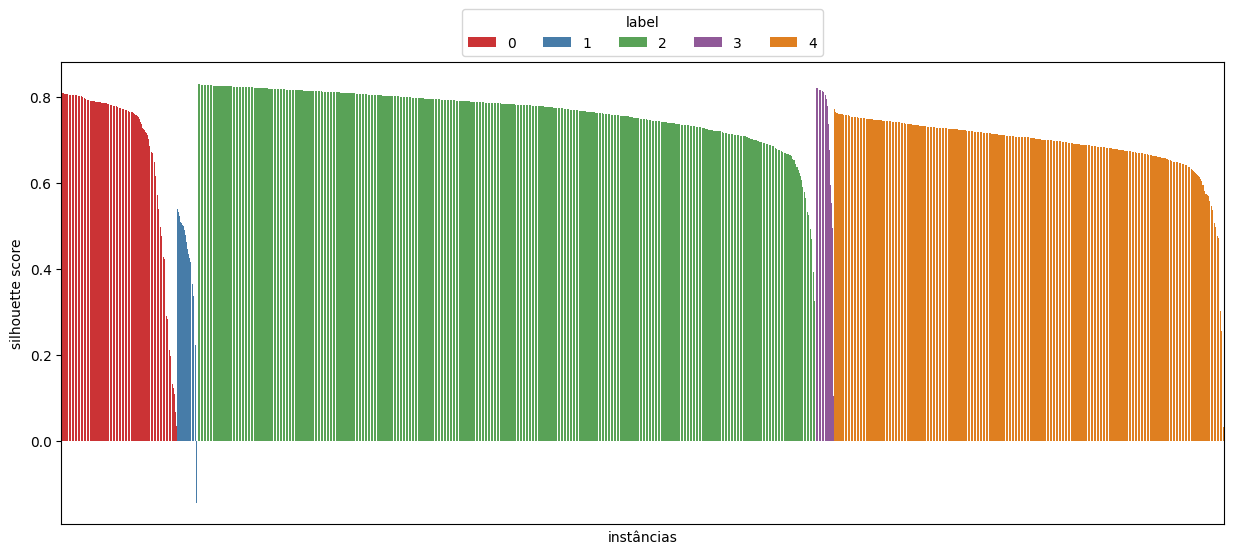

In [13]:
score_df = pd.DataFrame(dict(label=labels, score=sil_samples)).sort_values(["label", "score"], ascending=[True, False], ignore_index=True)
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(score_df, x=score_df.index, y="score", hue="label", errorbar=None, palette="Set1", ax=ax)

# Ajustes nos eixos e legenda
g.set(xticks=[], xlabel="inst√¢ncias", ylabel="silhouette score")
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=20)

plt.show()

**Caracter√≠sticas de clusters bem formados:**
- **Largura uniforme**: valores de silhouette consistentemente altos (pr√≥ximos a 1)
- **Poucos valores negativos**: aus√™ncia ou m√≠nima presen√ßa de pontos mal classificados
- **Espessura proporcional**: tamanhos de clusters balanceados quando apropriado
- **Valores acima da m√©dia global**: a maioria dos pontos do cluster supera o score m√©dio

**Sinais de problemas na clusteriza√ß√£o:**
- **Clusters "finos"**: valores de silhouette baixos indicando sobreposi√ß√£o
- **Muitos valores negativos**: pontos que estariam melhor em outros clusters
- **Assimetria extrema**: clusters muito desbalanceados em tamanho
- **Valores consistentemente abaixo da m√©dia**: clusters de baixa qualidade

Nos resultados obtidos, temos um resultado satisfat√≥rio, considerando as caracter√≠sticas desej√°veis e n√£o desej√°veis listadas acima.

Uma outra forma t√≠pica de visualizar o resultado √© reduzindo a dimensionalidade do dataset para 2 dimens√µes e plotando os clusters em um gr√°fico XY. A interpreta√ß√£o se d√° de forma mais intuitiva, onde √© poss√≠vel identificar pontos aglomerados ou separados do seu conjunto:

‚ÑπÔ∏è Dimens√µes de X ap√≥s PCA: (2722, 2)


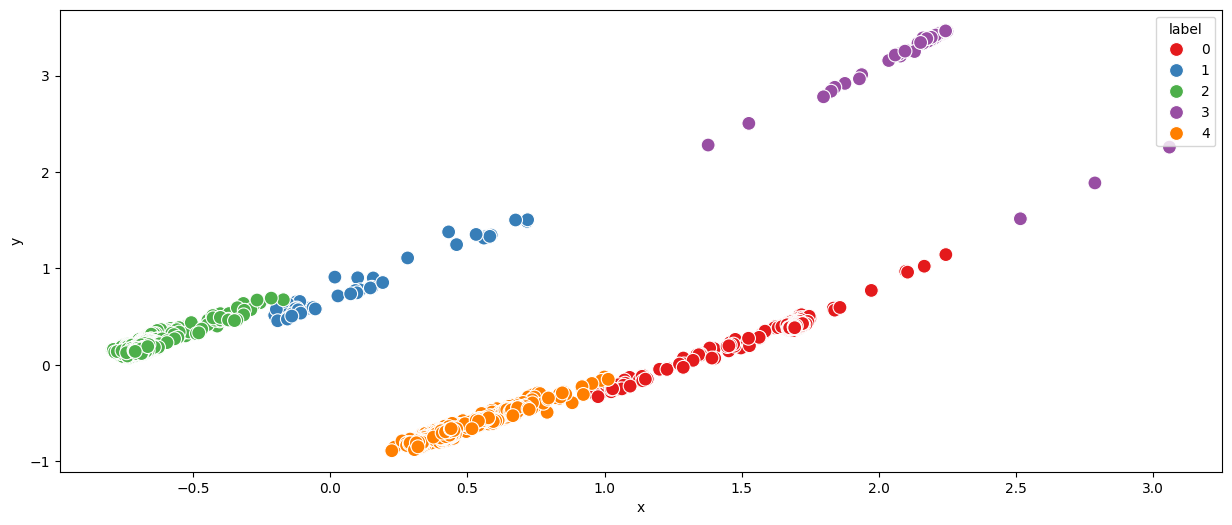

In [14]:
pca_2d = Pipeline([
    ("pre", preprocessor),
    ("model", PCA(n_components=2, random_state=SEED)),
])
X_2d = pca_2d.fit_transform(X)
print("‚ÑπÔ∏è Dimens√µes de X ap√≥s PCA:", X_2d.shape)

clusters_df = pd.DataFrame(dict(x=X_2d[:, 0], y=X_2d[:, 1], label=labels)).sort_values("label", ignore_index=True)
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.scatterplot(clusters_df, x="x", y="y", hue="label", s=100, palette="Set1", ax=ax)

plt.show()

Apesar de alguns overlaps, os conjuntos parecem bem definidos. No entanto, com a redu√ß√£o de dimensionalidade, perdem-se informa√ß√µes que podem comprometer um pouco a interpreta√ß√£o e avalia√ß√£o da qualidade dos clusters.

Por √∫ltimo, no caso espec√≠fico do nosso problema, por existir uma vari√°vel temporal, podemos ver como os grupos ficaram aglomerados nessa dimens√£o:

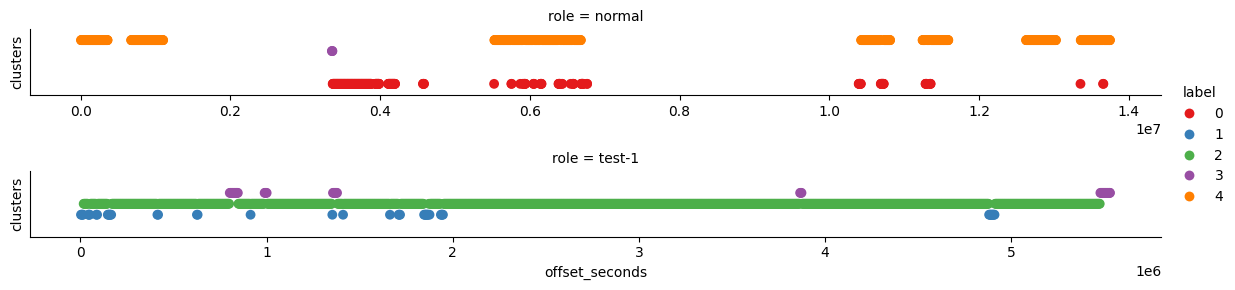

In [15]:
timeline_df = pd.DataFrame(dict(role=df["role"], offset_seconds=df["offset_seconds"], label=labels)).sort_values(["role", "offset_seconds"], ignore_index=True)

# fig, ax = plt.subplots(2, figsize=(20, 6))
# g = sns.pointplot(timeline_df, x="offset_seconds", y="label", hue="role", linestyle="none", palette="husl", ax=ax)
g = sns.relplot(timeline_df, x="offset_seconds", y="label", hue="label", row="role", kind="scatter", marker="o", s=50, alpha=1, linewidth=0, palette="Set1", height=1.5, aspect=8, facet_kws=dict(sharex=False))

# Ajustes nos eixos e legenda
g.set(ylim=(labels.min()-1, labels.max()+1), yticks=[], ylabel="clusters")
# plt.xticks(rotation=90)

plt.show()

De uma forma geral, com exce√ß√£o dos clusters 1 e 3, os agrupamentos tendem a ter segmentos cont√≠nuos no tempo, com algumas poucas separa√ß√µes. Isso condiz com a realidade do problema em quest√£o: perfis operacionais de um equipamento industrial (Turbina a G√°s). Interessante notar que justamente os clusters 1 e 3 tamb√©m apresentaram uma qualidade inferior no gr√°fico Silhouette Samples, o que denota consist√™ncia da an√°lise.

# **Conclus√£o**

O problema de clusteriza√ß√£o abordado nesse estudo √© uma primeira etapa de uma an√°lise mais abrangente da condi√ß√£o do equipamento (Turbina a G√°s). A modelagem busca encontrar os agrupamentos de maior qualidade/mais n√≠tidos para o dataset espec√≠fico, que representem os diferentes perfis operacionais do equipamento. Essa clusteriza√ß√£o ajudar√° na identifica√ß√£o e rotula√ß√£o dos perfis operacionais pelos experts do dom√≠nio, sendo esta uma etapa inicial muito importante para futuras aplica√ß√µes de modelos, como detec√ß√£o de anomalias, em que √© importante balancearmos os dados correspondentes √† cada perfil operacional distinto.

O estudo contemplou a escolha da m√©trica mais adequada para o problema e as otimiza√ß√µes de hiperpar√¢metros, resultando numa clusteriza√ß√£o satisfat√≥ria para objetivos futuros, conforme citado. No caso de novos datasets, um novo treinamento dever√° ser realizado com os novos dados, visto que o modelo √© mais apropriado para clusterizar o dataset no qual ele foi treinado, mas podendo-se utilizar o mesmo tipo de modelo e t√©cnica aqui definidos. O objetivo final √© embarcar essa t√©cnica em uma ferramenta de an√°lise de equipamentos, em que o usu√°rio (expert do dom√≠nio) contar√° com ferramentas que o auxiliar√° na prepara√ß√£o dos dados, treinamento e coloca√ß√£o do modelo em produ√ß√£o.